In [47]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

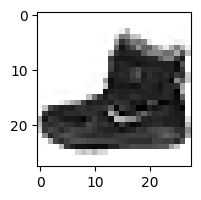

In [48]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_val, X_test = X_train/255., X_val/255., X_test/255.

X_train[0]

plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='binary' )

In [49]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(len(X_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [64]:
from tensorflow.train import BytesList, Int64List
from tensorflow.train import Example, Features, Feature
from contextlib import ExitStack
import os

def parse_single_image(image, label):
  
    raw_image = tf.io.serialize_tensor(image)
    
    example = Example(
      features=Features(
        feature = {
          "image": Feature(bytes_list=BytesList(value=[raw_image.numpy()])),
          "label": Feature(int64_list=Int64List(value=[label]))
        }
      )
    )
            
    return example
  

def write_tfrecords(name, dataset, n_shards=25):
    paths = ["{}.tfrecord-{:05d}-of-{:05d}".format(name, index, n_shards) for index in range(1, n_shards + 1)]
    
    with ExitStack() as stack:
        writers = [stack.enter_context(tf.io.TFRecordWriter(path)) for path in paths]
        
        for index, (image, label) in dataset.enumerate():
            shard = index % n_shards
            example = parse_single_image(image, label)
            writers[shard].write(example.SerializeToString())
    
    return paths
  
def get_dataset(pattern):
  files = [file for file in os.listdir() if pattern in file]
  
  dataset = tf.data.TFRecordDataset(files)
  
  return dataset

In [63]:
train_filepaths = write_tfrecords("my_fashion_mnist.train", train_dataset)
valid_filepaths = write_tfrecords("my_fashion_mnist.valid", val_dataset)
test_filepaths = write_tfrecords("my_fashion_mnist.test", test_dataset)

In [60]:
test_tfrecord = get_dataset("test.tfrecord")

['my_fashion_mnist.test.tfrecord-00000-of-00025', 'my_fashion_mnist.test.tfrecord-00001-of-00025', 'my_fashion_mnist.test.tfrecord-00002-of-00025', 'my_fashion_mnist.test.tfrecord-00003-of-00025', 'my_fashion_mnist.test.tfrecord-00004-of-00025', 'my_fashion_mnist.test.tfrecord-00005-of-00025', 'my_fashion_mnist.test.tfrecord-00006-of-00025', 'my_fashion_mnist.test.tfrecord-00007-of-00025', 'my_fashion_mnist.test.tfrecord-00008-of-00025', 'my_fashion_mnist.test.tfrecord-00009-of-00025', 'my_fashion_mnist.test.tfrecord-00010-of-00025', 'my_fashion_mnist.test.tfrecord-00011-of-00025', 'my_fashion_mnist.test.tfrecord-00012-of-00025', 'my_fashion_mnist.test.tfrecord-00013-of-00025', 'my_fashion_mnist.test.tfrecord-00014-of-00025', 'my_fashion_mnist.test.tfrecord-00015-of-00025', 'my_fashion_mnist.test.tfrecord-00016-of-00025', 'my_fashion_mnist.test.tfrecord-00017-of-00025', 'my_fashion_mnist.test.tfrecord-00018-of-00025', 'my_fashion_mnist.test.tfrecord-00019-of-00025', 'my_fashion_mnist.t